In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('CO2 dataset.xlsx - Sheet1.csv')
data

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542
...,...,...
210,2010,15.60000
211,2011,15.60000
212,2012,14.80000
213,2013,14.70000


In [3]:
data = data.set_index(['Year'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1800 to 2014
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO2     215 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


In [5]:
data.isna().sum()

CO2    0
dtype: int64

In [6]:
data.describe()

,CO2
count,215.000000
mean,6.741970
std,6.522437
min,0.001750
25%,0.041050
50%,6.390000
75%,11.500000
max,18.200000


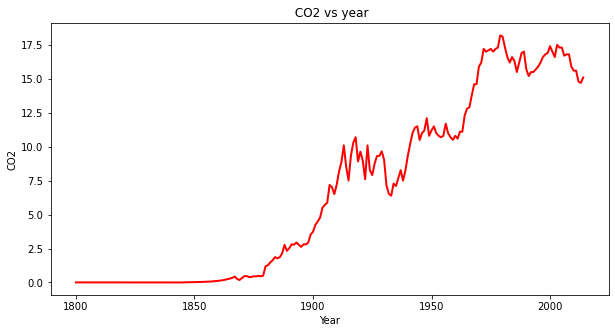

In [7]:
plt.figure(figsize=(10,5))
plt.title(' CO2 vs year')
plt.xlabel("Year")
plt.ylabel("CO2")
plt.plot(data, color = 'red', linewidth=2)
plt.show()

C:\Users\Shri Ganesha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


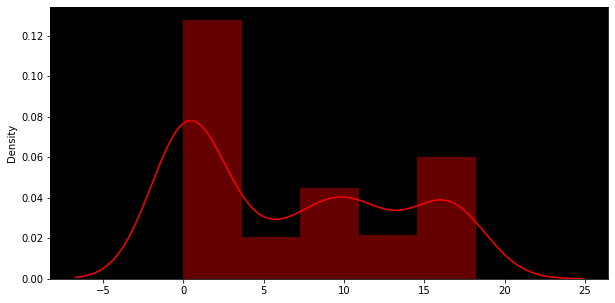

In [8]:
plt.figure(figsize = (10,5))
ax = plt.axes()
ax.set_facecolor("black")
sns.distplot(data,color = 'red')
plt.show()

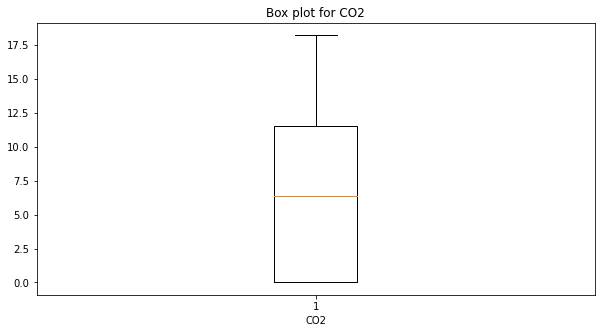

In [8]:

plt.figure(figsize = (10,5))
plt.title('Box plot for CO2')
plt.boxplot(data)
plt.xlabel('CO2')
plt.show()

<Figure size 720x360 with 0 Axes>

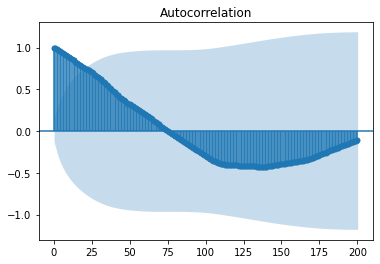

In [9]:
from statsmodels.graphics import tsaplots as tsa_plots

plt.figure(figsize = (10,5))
tsa_plots.plot_acf(data,lags = 200)
plt.show()

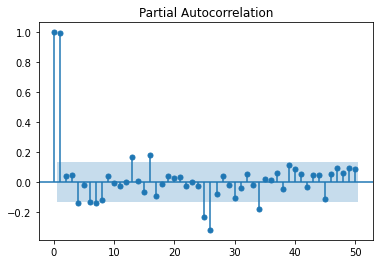

In [10]:
tsa_plots.plot_pacf(data,lags = 50)
plt.show()

In [11]:
# Dickey–Fuller test

In [12]:
from statsmodels.tsa.stattools import adfuller

print('Observations of Dickey-fuller test')
dftest = adfuller(data['CO2'],autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4],index = ['Test Statistic','p-value','Lag Used','Number of observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)    

Observations of Dickey-fuller test
Test Statistic                  -0.378463
p-value                          0.913633
Lag Used                         0.000000
Number of observations Used    214.000000
Critical Value (1%)             -3.461282
Critical Value (5%)             -2.875143
Critical Value (10%)            -2.574020
dtype: float64


In [13]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [14]:
# separate out a validation dataset
split_point = len(data) - 10
dataset, validation = data[0:split_point], data[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 205, Validation 10


In [14]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.85)
train, test = X[0:train_size], X[train_size:]

# grid search ARIMA parameters for a time series

In [15]:


import warnings
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.75)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [16]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), 0
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=10.485
ARIMA(0, 0, 1) RMSE=5.626
ARIMA(0, 0, 2) RMSE=3.383
ARIMA(0, 1, 0) RMSE=0.551
ARIMA(0, 1, 1) RMSE=0.560
ARIMA(0, 1, 2) RMSE=0.565
ARIMA(0, 2, 0) RMSE=0.716
ARIMA(0, 2, 1) RMSE=0.543
ARIMA(0, 2, 2) RMSE=0.555
ARIMA(1, 0, 0) RMSE=0.558
ARIMA(1, 0, 1) RMSE=0.565
ARIMA(1, 0, 2) RMSE=0.571
ARIMA(1, 1, 0) RMSE=0.557
ARIMA(1, 1, 1) RMSE=0.556
ARIMA(1, 1, 2) RMSE=0.610
ARIMA(1, 2, 0) RMSE=0.647
ARIMA(1, 2, 1) RMSE=0.551
ARIMA(1, 2, 2) RMSE=0.589
ARIMA(2, 0, 0) RMSE=0.564
ARIMA(2, 0, 1) RMSE=0.606
ARIMA(2, 0, 2) RMSE=0.622
ARIMA(2, 1, 0) RMSE=0.566
ARIMA(2, 1, 1) RMSE=0.599
ARIMA(2, 1, 2) RMSE=0.606
ARIMA(2, 2, 0) RMSE=0.617
ARIMA(2, 2, 1) RMSE=0.560
ARIMA(2, 2, 2) RMSE=0.599
Best ARIMA(0, 2, 1) RMSE=0.543


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Year
1800     0.050948
1801     0.055767
1802     0.055470
1803     0.054607
1804     0.053704
          ...    
2010    23.206575
2011    23.369126
2012    23.531678
2013    23.694229
2014    23.856781
Length: 215, dtype: float64
2.089165886183223


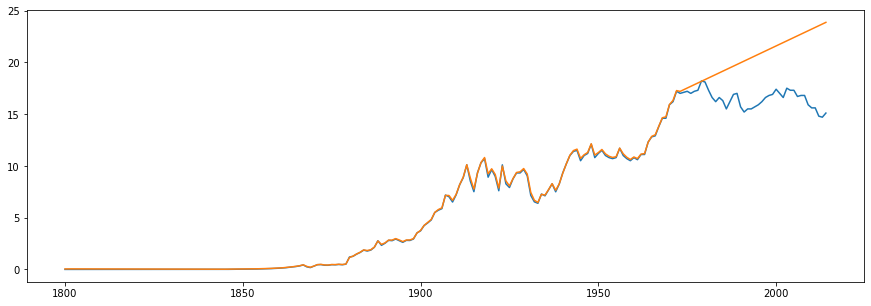

In [17]:
# Holt method
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing 
hw_model = Holt(train).fit()
pred_hw = hw_model.predict(1,215)
prediction_series = pd.Series(pred_hw,index = data.index)
print(prediction_series)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.plot(data['CO2'])
plt.plot(prediction_series)
rmse2 = np.sqrt(mean_squared_error(data['CO2'],pred_hw))
print(rmse2)

2.089165886183223
Year
1800     0.050948
1801     0.055767
1802     0.055470
1803     0.054607
1804     0.053704
          ...    
2010    23.206575
2011    23.369126
2012    23.531678
2013    23.694229
2014    23.856781
Length: 215, dtype: float64


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


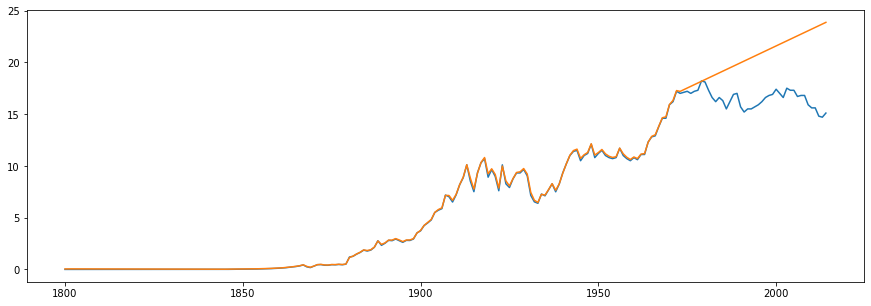

In [18]:
#Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
#Exponential Smoothing with Additive trend
exp_add = ExponentialSmoothing(train,trend = 'add').fit()
prediction = exp_add.predict(1,215)
rmse3 = np.sqrt(mean_squared_error(data['CO2'],prediction))
print(rmse3)
prediction_series = pd.Series(prediction,index = data.index)
print(prediction_series)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.plot(data['CO2'])
plt.plot(prediction_series)

10.482975485475599
Year
1800     0.005659
1801     0.005491
1802     0.005418
1803     0.005356
1804     0.005304
          ...    
2010    55.795840
2011    57.555931
2012    59.371544
2013    61.244431
2014    63.176398
Length: 215, dtype: float64


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


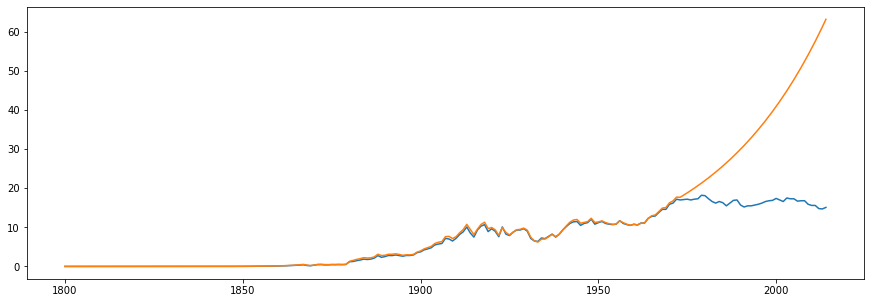

In [20]:
#Exponential Smoothing with multiplicative trend
exp_mul = ExponentialSmoothing(train,trend = 'mul').fit()
prediction = exp_mul.predict(1,215)
rmse4 =np.sqrt(mean_squared_error(data['CO2'],prediction))
print(rmse4)
prediction_series = pd.Series(prediction,index = data.index)
print(prediction_series)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.plot(data['CO2'])
plt.plot(prediction_series)

In [21]:
rmse_df = pd.DataFrame({'Model':['ARIMA','Holt method','ExponentialSmoothing_add','ExponentialSmoothing_mul'],'RMSE':[0.543,rmse2,rmse3,rmse4]})

In [22]:
rmse_df

,Model,RMSE
0,ARIMA,0.543000
1,Holt method,2.089166
2,ExponentialSmoothing_add,2.089166
3,ExponentialSmoothing_mul,10.482975


In [23]:
import pandas
pandas.__version__

'1.2.4'

In [24]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

In [25]:
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = train.values
X = X.astype('float32')

In [26]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(X,order = (0,2,1))
model_fit = model.fit()

In [27]:
X = data.values
X = X.astype('float32')

In [28]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(X,order = (0,2,1))
model_fit = model.fit()

In [29]:
forecast = model_fit.forecast(steps = 26)

In [30]:
forecast

array([15.17052836, 15.24105635, 15.31158433, 15.38211231, 15.45264029,
       15.52316828, 15.59369626, 15.66422424, 15.73475222, 15.80528021,
       15.87580819, 15.94633617, 16.01686415, 16.08739214, 16.15792012,
       16.2284481 , 16.29897608, 16.36950407, 16.44003205, 16.51056003,
       16.58108801, 16.651616  , 16.72214398, 16.79267196, 16.86319994,
       16.93372793])

In [39]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  215
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -177.122
Date:                Sat, 19 Feb 2022   AIC                            358.243
Time:                        15:28:33   BIC                            364.966
Sample:                             0   HQIC                           360.960
                                - 215                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9998      0.534     -1.872      0.061      -2.047       0.047
sigma2         0.3012      0.163      1.848      0.065      -0.018       0.621
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):               127.23
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):             236.59   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

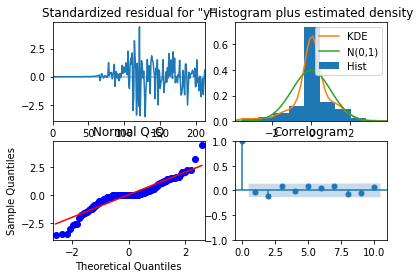

In [31]:
model_fit.plot_diagnostics()
plt.show()

# Predicted Plot

In [32]:
future_year = [len(data)+i-1 for i in range(1,27)]
future_df = pd.DataFrame(index = future_year[:],columns = data.columns )

In [33]:
future_df['CO2'] = forecast 
Y = future_df.astype(float)

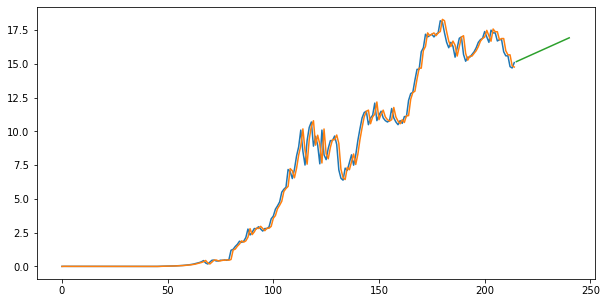

In [34]:
plt.figure(figsize=(10,5))
plt.plot(X,label = 'Original')
plt.plot(model_fit.predict(),label = 'Predicted')
plt.plot(Y,label = 'Predicted')
plt.show()